### Linear Model  on M2R-ParallelQuicksort

#### Loading data

In [3]:
data <- read.csv("measurements_03_47.csv",header=T)
print(head(data))

  Size        Type     Time
1  100  Sequential 0.000010
2  100    Parallel 0.004024
3  100    Built-in 0.000013
4  100  Sequential 0.000010
5  100    Parallel 0.004448
6  100    Built-in 0.000014


In [4]:
summary(data)

      Size             Type                Time         
 Min.   :    100   Length:75          Min.   :0.000009  
 1st Qu.:   1000   Class :character   1st Qu.:0.000210  
 Median :  10000   Mode  :character   Median :0.016149  
 Mean   : 222220                      Mean   :0.051255  
 3rd Qu.: 100000                      3rd Qu.:0.043877  
 Max.   :1000000                      Max.   :0.242869  

In [6]:
# Importing libraries
library(dplyr)
library(ggplot2)

#### Calculating amd adding summary statistics to the data

In [ ]:
data_summarized <- data %>% group_by(Type, Size) %>% summarize(n=n(), mean = mean(Time), sd = sd(Time), se = sd/sqrt(n))
print(data_summarized)

#### Confidence Interval

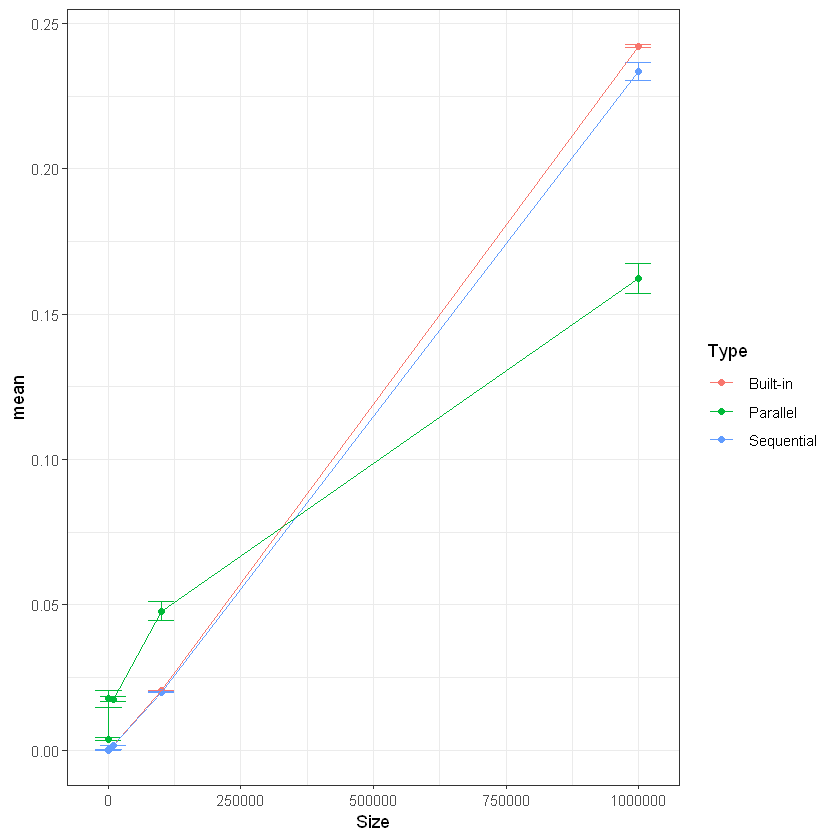

In [10]:
data_summarized %>% ggplot(aes(x=Size, y= mean, color=Type)) + 
geom_point() +
geom_errorbar(aes(ymin = mean-(2*se), ymax = mean+(2*se)), width = 50000) + 
theme_bw() + 
geom_line()

#### Linear regression model for Type - " Built - in"

In [45]:
reg_type_1 = lm(data = data[data$Type==" Built-in",], Time ~ Size) #Notice that Built-in has a space before 1st letter in given data
summary(reg_type_1)


Call:
lm(formula = Time ~ Size, data = data[data$Type == " Built-in", 
    ])

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0029607 -0.0003849  0.0005001  0.0010631  0.0010858 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.096e-03  3.513e-04   -3.12  0.00482 ** 
Size         2.431e-07  7.817e-10  310.98  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.001527 on 23 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 9.671e+04 on 1 and 23 DF,  p-value: < 2.2e-16


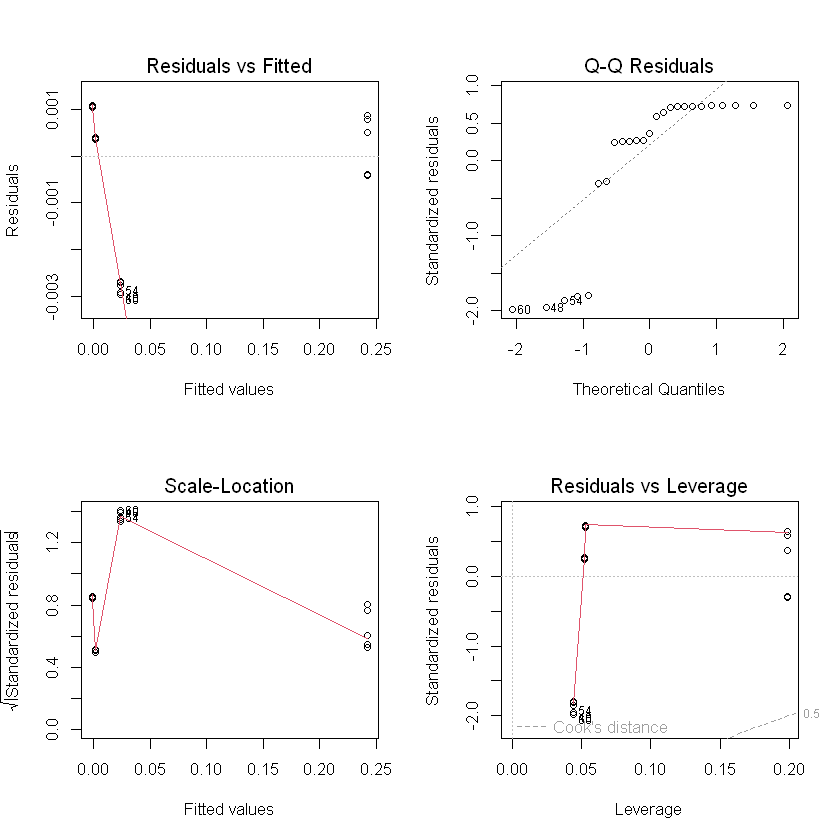

In [47]:
par(mfrow=c(2,2));
plot(reg_type_1)

#### Linear regression model for Type - " Parallel"

In [49]:
reg_type_2 = lm(data = data[data$Type==" Parallel",], Time ~ Size) #Notice that Built-in has a space before 1st letter in given data
summary(reg_type_2)


Call:
lm(formula = Time ~ Size, data = data[data$Type == " Parallel", 
    ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.014052 -0.002723 -0.001290  0.004686  0.018888 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.717e-02  2.364e-03   7.263 2.16e-07 ***
Size        1.468e-07  5.260e-09  27.904  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01027 on 23 degrees of freedom
Multiple R-squared:  0.9713,	Adjusted R-squared:  0.9701 
F-statistic: 778.6 on 1 and 23 DF,  p-value: < 2.2e-16


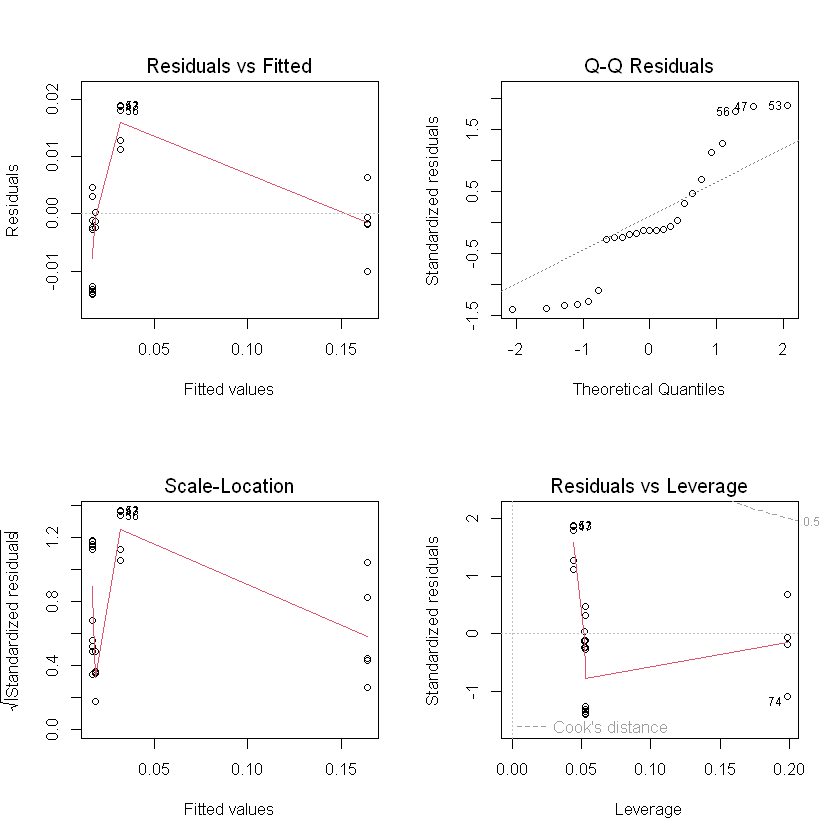

In [52]:
par(mfrow=c(2,2));
plot(reg_type_2)

#### Linear regression model for Type - " Sequential"

In [51]:
reg_type_3 = lm(data = data[data$Type==" Sequential",], Time ~ Size) #Notice that Built-in has a space before 1st letter in given data
summary(reg_type_3)


Call:
lm(formula = Time ~ Size, data = data[data$Type == " Sequential", 
    ])

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0032211 -0.0023774  0.0004466  0.0010015  0.0050659 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.016e-03  4.583e-04  -2.217   0.0368 *  
Size         2.343e-07  1.020e-09 229.807   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.001992 on 23 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9995 
F-statistic: 5.281e+04 on 1 and 23 DF,  p-value: < 2.2e-16


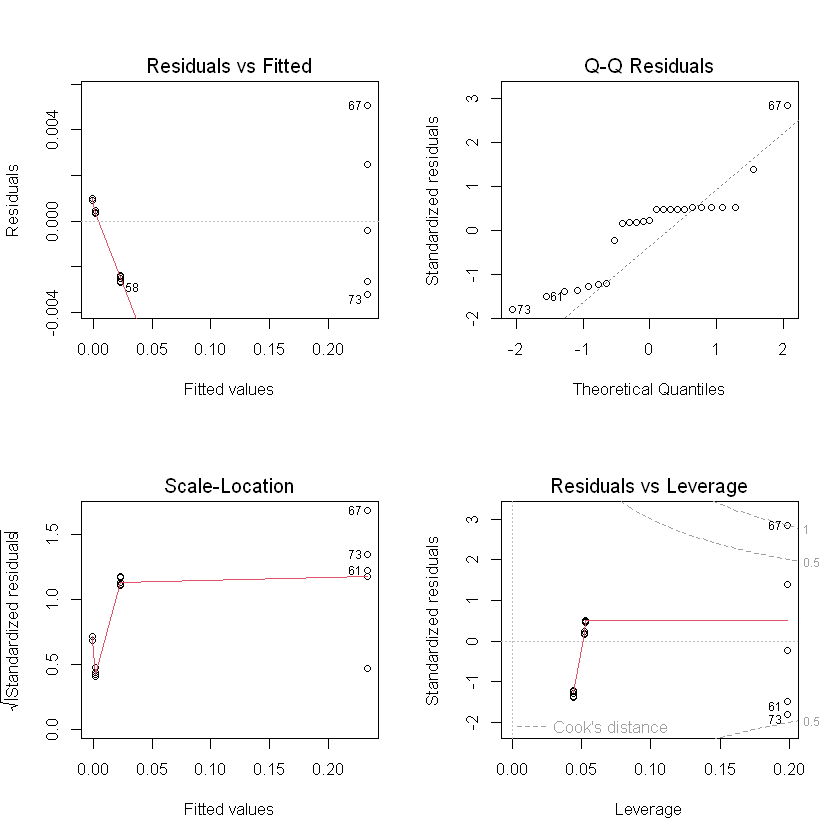

In [53]:
par(mfrow=c(2,2));
plot(reg_type_3)